Non-fault data saved to 'non_fault_data.csv'
Fault data saved to 'fault_data.csv'


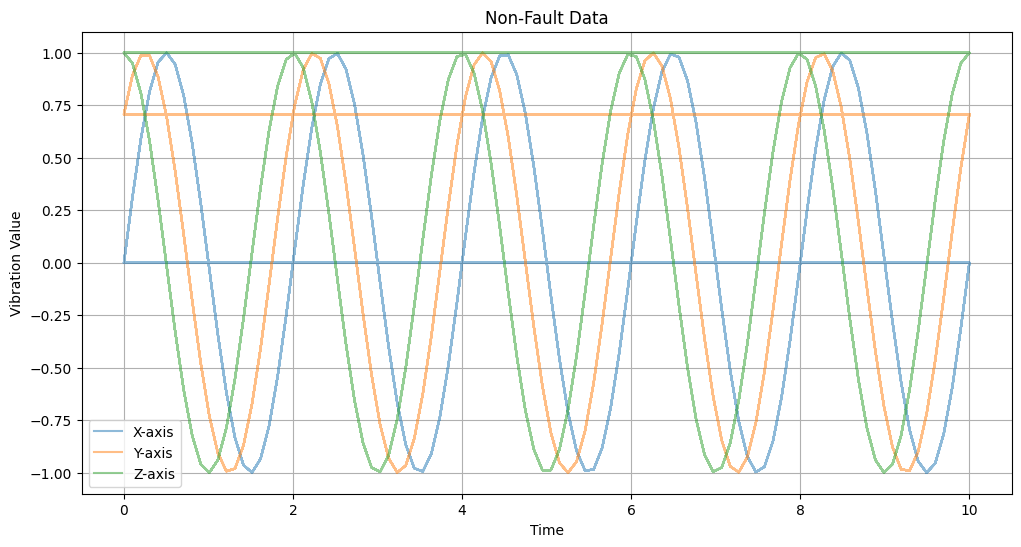

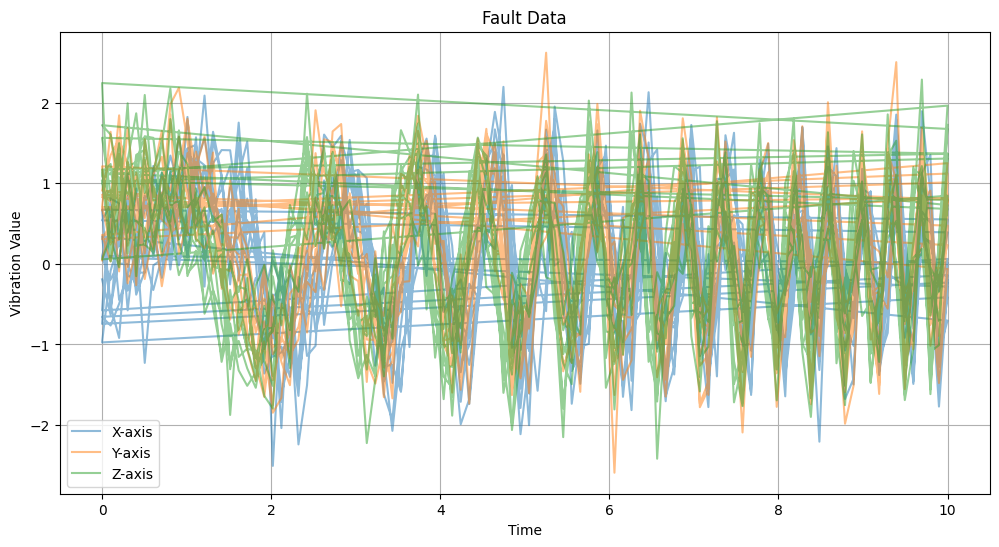

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Function to generate synthetic vibrational data with smoother waves
def generate_vibrational_data(samples=10, time_steps=100, noise_level=0.01, target_label="non-fault", stretch=False):
    # Time array ranging from 0 to 10 (time step 1 unit)
    t = np.linspace(0, 10, time_steps)
    
    # Frequency to get one oscillation every 2 time steps
    frequency = 0.5  # 0.5 Hz -> 1 oscillation every 2 time stamps
    
    # Generate sine wave data for x, y, z with variations
    if stretch and target_label == "fault":
        # Gradually stretch the sine wave
        stretch_factor = 3 * np.linspace(0, 1, time_steps)  # Stretch from 0 to 3π
        x = np.sin(2 * np.pi * frequency * t * stretch_factor) + noise_level * np.random.randn(samples, time_steps)
        y = np.sin(2 * np.pi * frequency * t * stretch_factor + np.pi / 4) + noise_level * np.random.randn(samples, time_steps)  # phase shift for variety
        z = np.sin(2 * np.pi * frequency * t * stretch_factor + np.pi / 2) + noise_level * np.random.randn(samples, time_steps)  # another phase shift
    else:
        # Normal sine wave without stretching
        x = (np.sin(2 * np.pi * frequency * t) + noise_level * np.random.randn(samples, time_steps))
        y = (np.sin(2 * np.pi * frequency * t + np.pi / 4) + noise_level * np.random.randn(samples, time_steps))  # phase shift for variety
        z = (np.sin(2 * np.pi * frequency * t + np.pi / 2) + noise_level * np.random.randn(samples, time_steps))  # another phase shift

    # Combine time, x, y, z into a DataFrame with the target label
    data = pd.DataFrame({
        'time': np.tile(t, samples),              # Repeat time for each sample
        'x': x.flatten(),                         # Flatten x, y, z for each sample
        'y': y.flatten(),
        'z': z.flatten(),
        'target': target_label                   # Assign target label to each sample row
    })

    return data

# Generate data for non-fault and fault cases
non_fault_data = generate_vibrational_data(samples=10, time_steps=100, noise_level=0.0, target_label="non-fault")
fault_data = generate_vibrational_data(samples=10, time_steps=100, noise_level=0.5, target_label="fault", stretch=True)

# Save non-fault and fault data to separate CSV files
non_fault_data.to_csv('_non_fault_data.csv', index=False)
fault_data.to_csv('fault_data.csv', index=False)

print("Non-fault data saved to 'non_fault_data.csv'")
print("Fault data saved to 'fault_data.csv'")

# Function to plot the data
def plot_data(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['time'], data['x'], label='X-axis', alpha=0.5)
    plt.plot(data['time'], data['y'], label='Y-axis', alpha=0.5)
    plt.plot(data['time'], data['z'], label='Z-axis', alpha=0.5)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Vibration Value')
    plt.legend()
    plt.grid()
    plt.show()

# Plot non-fault and fault data
plot_data(non_fault_data, 'Non-Fault Data')
plot_data(fault_data, 'Fault Data')


Peak-drop fault data saved to 'peak_drop_fault_data.csv'


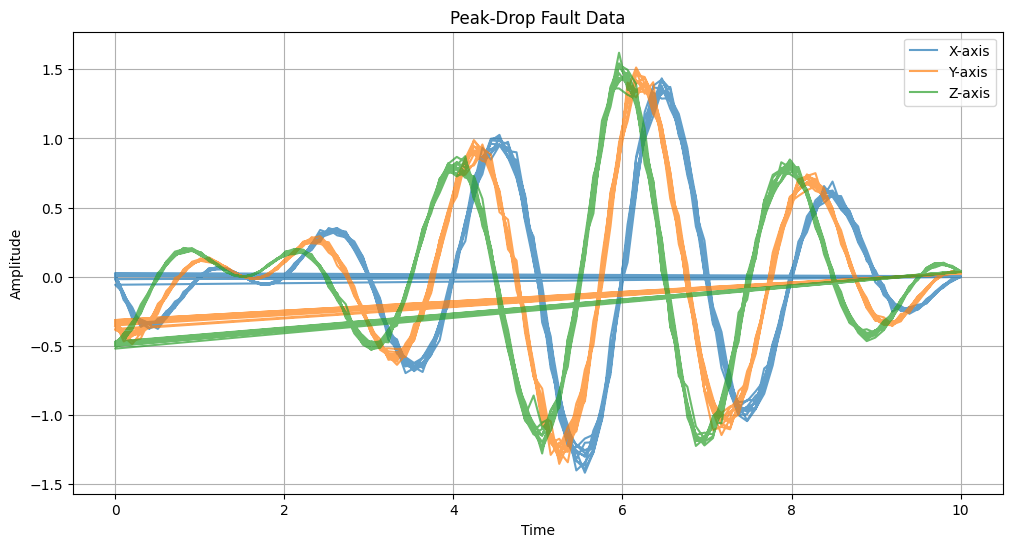

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modified function to generate fault data with amplitude ranging from -0.5 to 1.5, then decreasing to zero
def generate_peak_drop_fault_data(samples=10, time_steps=100, noise_level=0.05):
    # Time array ranging from 0 to 10 (time step 1 unit)
    t = np.linspace(0, 10, time_steps)
    
    # Frequency to get one oscillation every 2 time steps
    frequency = 0.5 # 0.5 Hz -> 1 oscillation every 2 time steps
    
    # Initialize empty arrays for x, y, z data with peak-drop amplitude pattern
    x = np.zeros((samples, time_steps))
    y = np.zeros((samples, time_steps))
    z = np.zeros((samples, time_steps))
    
    # Set midpoint when amplitude reaches 1.5
    midpoint = int(time_steps * 0.6)  # Adjust this value for when the amplitude should peak
    
    for i in range(samples):
        for j in range(time_steps):
            # Increase amplitude from -0.5 to 1.5, then decrease to zero
            if j <= midpoint:
                amplitude = -0.5 + (2 * j / midpoint)  # Gradually increase from -0.5 to 1.5
            else:
                amplitude = 1.5 * (1 - ((j - midpoint) / (time_steps - midpoint)))  # Gradually decrease to zero
            
            # Generate sine waves with varying amplitude and noise
            x[i, j] = amplitude * (np.sin(2 * np.pi * frequency * t[j]) + noise_level * np.random.randn())
            y[i, j] = amplitude * (np.sin(2 * np.pi * frequency * t[j] + np.pi / 4) + noise_level * np.random.randn())
            z[i, j] = amplitude * (np.sin(2 * np.pi * frequency * t[j] + np.pi / 2) + noise_level * np.random.randn())
    
    # Combine into a DataFrame
    data = pd.DataFrame({
        'time': np.tile(t, samples),              # Repeat time for each sample
        'x': x.flatten(),                         # Flatten x, y, z for each sample
        'y': y.flatten(),
        'z': z.flatten(),
        'target': "fault"                         # Label as "fault" data
    })

    return data

# Generate fault data with peak-drop pattern
peak_drop_fault_data = generate_peak_drop_fault_data(samples=10, time_steps=100, noise_level=0.05)

# Save the data to a CSV file
peak_drop_fault_data.to_csv('peak_drop_fault_data.csv', index=False)

print("Peak-drop fault data saved to 'peak_drop_fault_data.csv'")

# Plotting function
def plot_data(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['time'], data['x'], label='X-axis', alpha=0.7)
    plt.plot(data['time'], data['y'], label='Y-axis', alpha=0.7)
    plt.plot(data['time'], data['z'], label='Z-axis', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the data
plot_data(peak_drop_fault_data, 'Peak-Drop Fault Data')


Peak-drop fault data saved to 'peak_drop_fault_data.csv'


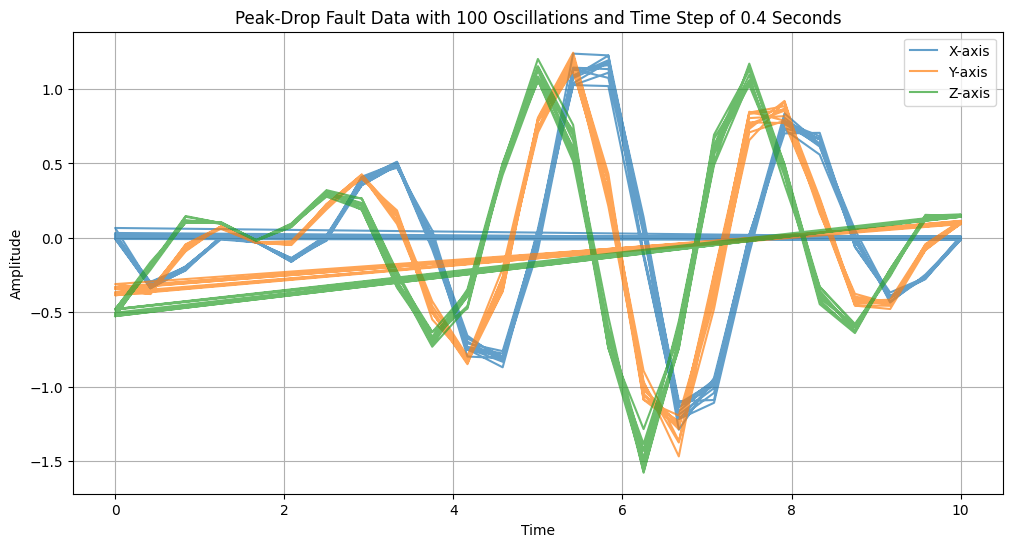

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modified function to generate fault data with a time step difference of 0.4 seconds
def generate_peak_drop_fault_data(samples=10, time_steps=25, noise_level=0.05):
    # Time array ranging from 0 to 10 with step size of 0.4
    t = np.linspace(0, 10, time_steps)
    
    # Frequency to get 100 oscillations over 10 seconds
    frequency = 10  # 10 Hz -> 1 oscillation per 0.1 seconds
    
    # Initialize empty arrays for x, y, z data with peak-drop amplitude pattern
    x = np.zeros((samples, time_steps))
    y = np.zeros((samples, time_steps))
    z = np.zeros((samples, time_steps))
    
    # Set midpoint when amplitude reaches 1.5
    midpoint = int(time_steps * 0.6)  # Adjust this value for when the amplitude should peak
    
    for i in range(samples):
        for j in range(time_steps):
            # Increase amplitude from -0.5 to 1.5, then decrease to zero
            if j <= midpoint:
                amplitude = -0.5 + (2 * j / midpoint)  # Gradually increase from -0.5 to 1.5
            else:
                amplitude = 1.5 * (1 - ((j - midpoint) / (time_steps - midpoint)))  # Gradually decrease to zero
            
            # Generate sine waves with varying amplitude and noise
            x[i, j] = amplitude * (np.sin(2 * np.pi * frequency * t[j]) + noise_level * np.random.randn())
            y[i, j] = amplitude * (np.sin(2 * np.pi * frequency * t[j] + np.pi / 4) + noise_level * np.random.randn())
            z[i, j] = amplitude * (np.sin(2 * np.pi * frequency * t[j] + np.pi / 2) + noise_level * np.random.randn())
    
    # Combine into a DataFrame
    data = pd.DataFrame({
        'time': np.tile(t, samples),              # Repeat time for each sample
        'x': x.flatten(),                         # Flatten x, y, z for each sample
        'y': y.flatten(),
        'z': z.flatten(),
        'target': "fault"                         # Label as "fault" data
    })

    return data

# Generate fault data with peak-drop pattern
peak_drop_fault_data = generate_peak_drop_fault_data(samples=10, time_steps=25, noise_level=0.05)

# Save the data to a CSV file
peak_drop_fault_data.to_csv('lagger.csv', index=False)

print("Peak-drop fault data saved to 'peak_drop_fault_data.csv'")

# Plotting function
def plot_data(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['time'], data['x'], label='X-axis', alpha=0.7)
    plt.plot(data['time'], data['y'], label='Y-axis', alpha=0.7)
    plt.plot(data['time'], data['z'], label='Z-axis', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the data
plot_data(peak_drop_fault_data, 'Peak-Drop Fault Data with 100 Oscillations and Time Step of 0.4 Seconds')
